In [7]:
import numpy as np 
import cv2
import os 

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
os.getcwd()

'/Users/Satish/Desktop/Pythoncodes/pyimagesearch/CBIR'

In [9]:
image = cv2.imread(os.getcwd()+"/park_bench.jpg")

In [10]:
image = cv2.cvtColor(image , cv2.COLOR_BGR2HSV)
features = []

In [11]:
(h, w) = image.shape[:2]
(cX, cY) = (int(w*0.5), int(h*0.5))
print (h,w)
print (cX, cY)

480 640
320 240


In [12]:
segments = [(0, cX, 0, cY),(cX, w, 0, cY), (cX, w, cY, h), (0, cX, cY, h)]
print (segments)

[(0, 320, 0, 240), (320, 640, 0, 240), (320, 640, 240, 480), (0, 320, 240, 480)]


In [13]:
(axesX, axesY) = (int(w*0.75)/2, int(h*0.75)/2)
print (axesX, axesY)

240.0 180.0


In [14]:
ellipMask = np.zeros(image.shape[:2], dtype="uint8")
cv2.ellipse(ellipMask, (int(cX), int(cY)), (int(axesX), int(axesY)), 0, 0, 360, 255, -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

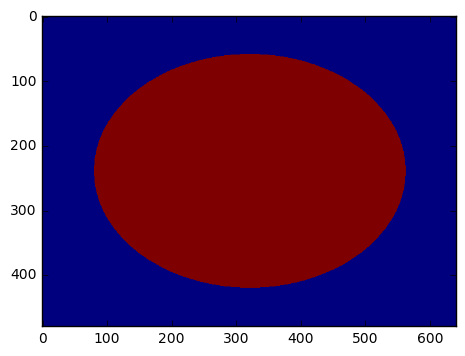

In [15]:
plt.imshow(ellipMask)

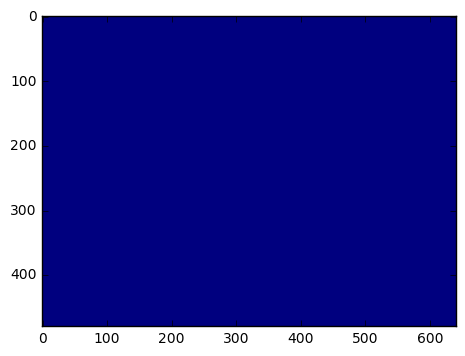

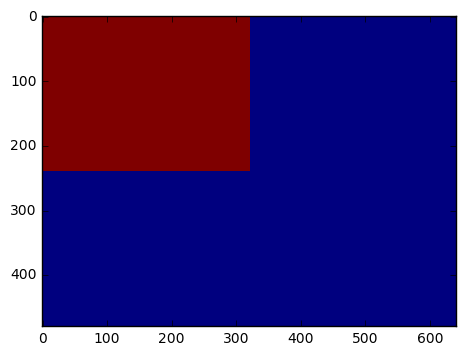

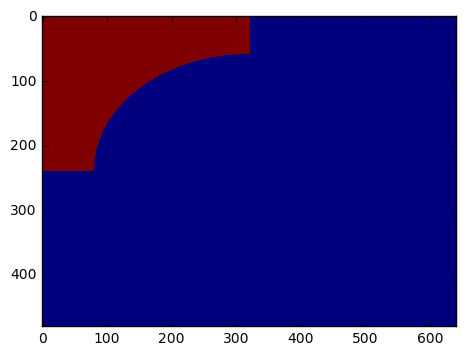

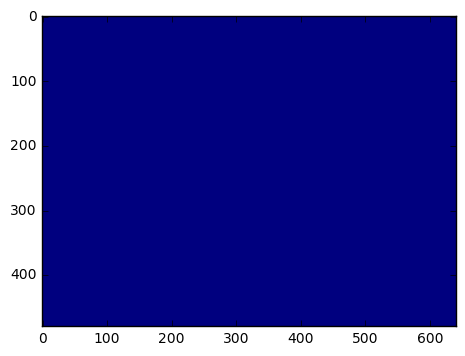

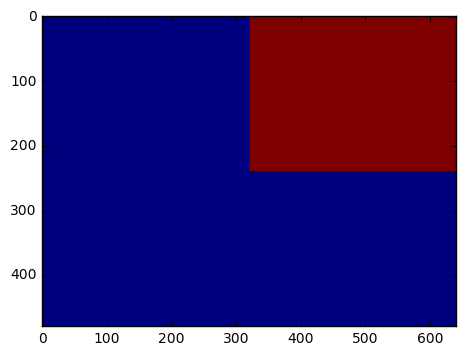

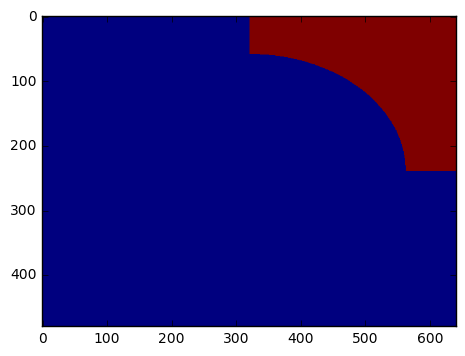

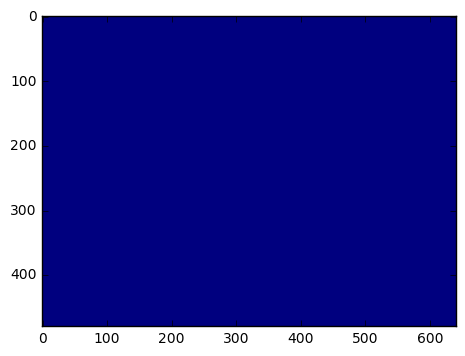

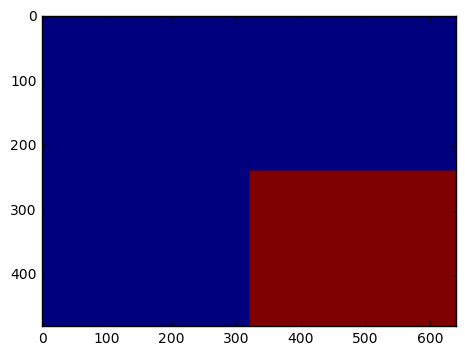

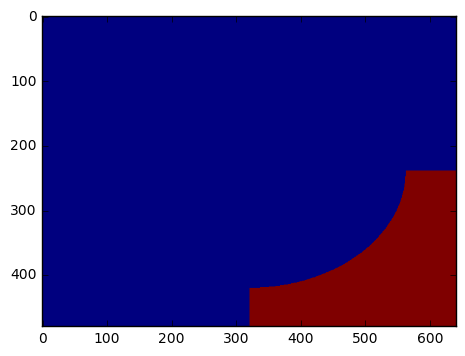

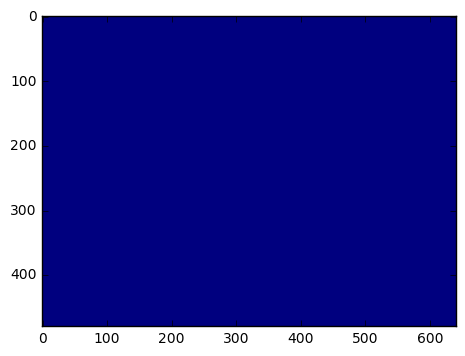

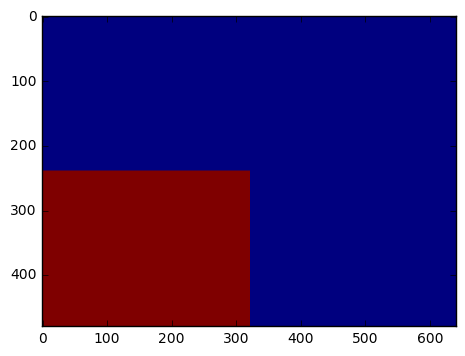

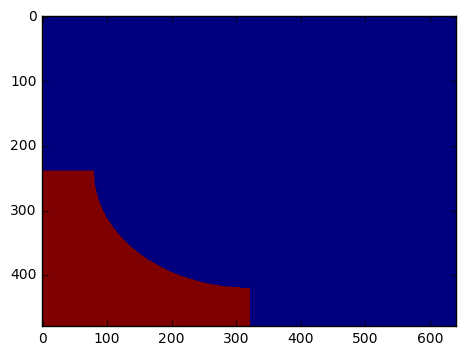

In [16]:
for (startX, endX, startY, endY) in segments:
    cornerMask =  np.zeros(image.shape[:2], dtype="uint8")
    plt.imshow(cornerMask)
    plt.show()
    cv2.rectangle(cornerMask, (startX, startY), (endX, endY), 255, -1)
    plt.imshow(cornerMask)
    plt.show()
    cornerMask = cv2.subtract(cornerMask, ellipMask)
    plt.imshow(cornerMask)
    plt.show()

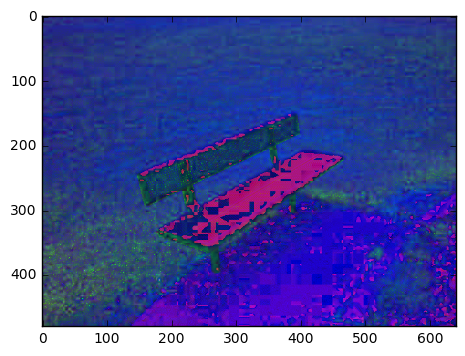

In [17]:
plt.imshow(image)

In [18]:
def histogram(image, mask = None):
    hist = cv2.calcHist([image], [0,1,2], mask, [10,10,10], [0, 180, 0, 256, 0 , 256])
    hist = cv2.normalize(hist).flatten()
    return hist

In [19]:
print (image.shape)
print (cornerMask.shape)

(480, 640, 3)
(480, 640)


In [20]:
hist1 = cv2.calcHist([image], [0,1,2], ellipMask, [10,10,10], [0, 180, 0, 256, 0 , 256])

In [21]:
hist1

array([[[  0.00000000e+00,   1.00000000e+00,   1.10000000e+02,
           4.00000000e+02,   9.39000000e+02,   1.50100000e+03,
           1.00900000e+03,   1.05400000e+03,   4.62000000e+02,
           1.50000000e+01],
        [  0.00000000e+00,   6.20000000e+01,   7.26000000e+02,
           1.74100000e+03,   1.52900000e+03,   9.95000000e+02,
           6.77000000e+02,   3.21000000e+02,   7.40000000e+01,
           5.00000000e+00],
        [  1.00000000e+00,   1.16000000e+02,   1.58500000e+03,
           1.19900000e+03,   2.52000000e+02,   4.05000000e+02,
           7.47000000e+02,   3.89000000e+02,   7.00000000e+01,
           6.00000000e+00],
        [  1.00000000e+00,   1.46000000e+02,   9.33000000e+02,
           1.67000000e+02,   4.50000000e+01,   8.20000000e+01,
           7.20000000e+01,   2.20000000e+01,   3.00000000e+00,
           0.00000000e+00],
        [  7.00000000e+00,   1.01000000e+02,   1.37000000e+02,
           2.60000000e+01,   2.10000000e+01,   1.20000000e+01,
      

In [22]:
hist1.shape

(10, 10, 10)

In [72]:
cv2.normalize(hist1, hist1).flatten()

array([  0.00000000e+00,   3.57360877e-05,   3.93096963e-03,
         1.42944353e-02,   3.35561857e-02,   5.36398664e-02,
         3.60577144e-02,   3.76658365e-02,   1.65100731e-02,
         5.36041334e-04,   0.00000000e+00,   2.21563736e-03,
         2.59444006e-02,   6.22165278e-02,   5.46404794e-02,
         3.55574079e-02,   2.41933316e-02,   1.14712846e-02,
         2.64447043e-03,   1.78680435e-04,   3.57360877e-05,
         4.14538616e-03,   5.66416979e-02,   4.28475700e-02,
         9.00549442e-03,   1.44731151e-02,   2.66948584e-02,
         1.39013380e-02,   2.50152615e-03,   2.14416534e-04,
         3.57360877e-05,   5.21746883e-03,   3.33417691e-02,
         5.96792670e-03,   1.60812400e-03,   2.93035922e-03,
         2.57299840e-03,   7.86193938e-04,   1.07208267e-04,
         0.00000000e+00,   2.50152603e-04,   3.60934483e-03,
         4.89584403e-03,   9.29138274e-04,   7.50457868e-04,
         4.28833067e-04,   3.57360877e-05,   0.00000000e+00,
         0.00000000e+00,

In [1]:
from hsvdescriptor import *

In [2]:
from imutils import paths
import argparse 
import cv2 
import glob 
import itertools
from tqdm import tqdm 

In [3]:
desc = HSVDescriptor((4, 6, 3))
output = open("index.csv", "w")

In [4]:
imagePaths = glob.glob("/Users/Satish/Downloads/kaggle-fish/data/*")
imagePaths = [glob.glob(imagePaths[i]+"/*") for i in range(len(imagePaths))]
imagePaths = list(itertools.chain(*imagePaths))
print (imagePaths[0])

/Users/Satish/Downloads/kaggle-fish/data/ALB/img_00003.jpg


In [5]:
for (i, imagePath)  in tqdm(enumerate(imagePaths)):
    filename = imagePath.rsplit("/")[-1]
    image = cv2.imread(imagePath)

    # describe the image 
    features = desc.describe(image)
    features = [str(x) for x in features]
    output.write("{}.{}\n".format(filename,",".join(features)))